In [59]:
# Dependencies
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import re 


# The below processes are to clean and merge movies & ratings raw data.

In [60]:
# Name the Movies CSV file
movies_file = pathlib.Path('Resources/IMDb_movies/IMDB movies.csv')

# Read and display the Movies CSV with Pandas
movies_df = pd.read_csv(movies_file)
movies_df.head()

C:\Users\grace\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [61]:
# movies_df.columns

# In the Movies data frame, most values are missing (blank), therefore column must be dropped in order not to loose any significant data 

movies_df['metascore'].isna().sum()

72550

In [62]:
# Delete dropping columns that found to be irrelevant for analysis or have too many missing values. 

movies_df_removed = movies_df.drop(['description','metascore','writer','duration','production_company','budget','language'],axis=1)
 
movies_df_removed.head()

,imdb_title_id,title,original_title,year,date_published,genre,country,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,USA,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",Australia,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,"Germany, Denmark",Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",USA,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",Italy,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237,NaN,NaN,31.0,14.0


In [63]:
# Set new index to 'imdb_title_id'

movies_df_removed_index = movies_df_removed.set_index("imdb_title_id")
movies_df_removed_index.head()

,title,original_title,year,date_published,genre,country,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,USA,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154,NaN,NaN,1.0,2.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",Australia,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589,NaN,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,"Germany, Denmark",Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188,NaN,NaN,5.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",USA,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,NaN,NaN,25.0,3.0
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",Italy,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237,NaN,NaN,31.0,14.0


In [64]:
movies_df_removed_index[['worlwide_gross_income','usa_gross_income']].isna().sum()

worlwide_gross_income    54839
usa_gross_income         70529
dtype: int64

In [65]:
# Replacing value in 'year' column and changing data type to integer
movies_df_removed_index['year'] = movies_df_removed_index['year'].replace(['TV Movie 2019'],'2019')
movies_df_removed_index['year'] = movies_df_removed_index['year'].astype('int64')

# Replacing value in 'date_published' column and changing data type to 'datetime'
movies_df_removed_index['date_published'] = movies_df_removed_index['date_published'].replace(['TV Movie 2019'],'2019')
movies_df_removed_index['date_published'] = movies_df_removed_index['date_published'].astype('datetime64[ns]')

# Filter based on years range from 1970 to 2020. 
movies_df_removed_index_1970 = movies_df_removed_index[(movies_df_removed_index['year']>=1970)]

movies_df_removed_index_1970

,title,original_title,year,date_published,genre,country,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"Drama, Romance",France,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,7.0,4.0
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",USA,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,$ 47121859,$ 76019048,341.0,115.0
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"Drama, War",UK,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,3.0,10.0
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Drama,"Spain, West Germany",Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,2.0,NaN
tt0054724,Zombie,Zombie,1971,1971-10-29,Horror,USA,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,56.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,"France, Belgium",Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",5.3,398,NaN,$ 3507171,NaN,4.0
tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",Netherlands,Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",7.7,724,NaN,$ 7299062,6.0,4.0
tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,India,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",7.9,265,NaN,NaN,NaN,NaN


In [66]:
movies_df_removed_index_1970[['worlwide_gross_income','usa_gross_income']].isna().sum()

worlwide_gross_income    39910
usa_gross_income         55655
dtype: int64

In [67]:
# split genre AND Country by comma delimiter and select first word
genre_split = movies_df_removed_index_1970["genre"].str.split(",", n=1, expand = True)
movies_df_removed_index_1970["genre_split"] = genre_split[0]
movies_df_removed_index_1970.columns

country_split = movies_df_removed_index_1970["country"].str.split(",", n=1, expand = True)
movies_df_removed_index_1970["country_split"] = country_split[0]
movies_df_removed_index_1970.head()

<ipython-input-67-195f3b4cdf27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_removed_index_1970["genre_split"] = genre_split[0]
<ipython-input-67-195f3b4cdf27>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_removed_index_1970["country_split"] = country_split[0]


,title,original_title,year,date_published,genre,country,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics,genre_split,country_split
imdb_title_id,,,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"Drama, Romance",France,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,7.0,4.0,Drama,France
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",USA,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,$ 47121859,$ 76019048,341.0,115.0,Comedy,USA
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"Drama, War",UK,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,3.0,10.0,Drama,UK
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Drama,"Spain, West Germany",Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,2.0,NaN,Drama,Spain
tt0054724,Zombie,Zombie,1971,1971-10-29,Horror,USA,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,56.0,40.0,Horror,USA


In [68]:
# Drop the 'country' & 'genre' columns once they're splitted
movies_df_removed_index_1970 = movies_df_removed_index_1970.drop(['country','genre'], axis = 1)
movies_df_removed_index_1970.head()

,title,original_title,year,date_published,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics,genre_split,country_split
imdb_title_id,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,7.0,4.0,Drama,France
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,$ 47121859,$ 76019048,341.0,115.0,Comedy,USA
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,3.0,10.0,Drama,UK
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,2.0,NaN,Drama,Spain
tt0054724,Zombie,Zombie,1971,1971-10-29,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,56.0,40.0,Horror,USA


In [69]:
movies_df_removed_index_1970["worlwide_gross_income"].value_counts()

$ 8144        13
$ 509          7
$ 97182        6
$ 2874         5
$ 14000000     5
              ..
$ 1238324      1
$ 459815       1
$ 377271       1
$ 1297         1
$ 214414       1
Name: worlwide_gross_income, Length: 29840, dtype: int64

In [70]:
movies_df_removed_index_1970["worlwide_gross_income"].describe()

count      30354
unique     29840
top       $ 8144
freq          13
Name: worlwide_gross_income, dtype: object

In [71]:
#movies_df_removed_index_1970["worlwide_gross_income"] = movies_df_removed_index_1970["worlwide_gross_income"].str.startswith("$")
movies_df_removed_index_1970["worlwide_gross_income"] = movies_df_removed_index["worlwide_gross_income"]


movies_df_removed_index_1970.head()

,title,original_title,year,date_published,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics,genre_split,country_split
imdb_title_id,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,7.0,4.0,Drama,France
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,$ 47121859,$ 76019048,341.0,115.0,Comedy,USA
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,3.0,10.0,Drama,UK
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,2.0,NaN,Drama,Spain
tt0054724,Zombie,Zombie,1971,1971-10-29,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,56.0,40.0,Horror,USA


In [72]:
# converting currencies to USD and then replace NA with average.
def clean_currency(currency: str) -> float:
    try:
        if currency[0].isnumeric():
            try:
                float_value = float(currency)
            except Exception as e:
                print(e)
        else:
            if currency[2].isnumeric():
                float_value = float(currency[2:].replace(',', ''))
            else:
                float_value = float(currency[4:].replace(',', '')) 
    except TypeError:
        float_value = float(currency)
    return float_value

movies_df_removed_index_1970["worlwide_gross_income"] = movies_df_removed_index_1970["worlwide_gross_income"].apply(clean_currency)


#movies_df_removed_index_1970["worlwide_gross_income"] = movies_df_removed_index_1970["worlwide_gross_income"].str.replace(',','').str.replace('$','').astype('float')

movies_df_removed_index_1970["usa_gross_income"] = movies_df_removed_index_1970["usa_gross_income"].apply(clean_currency)

movies_df_removed_index_1970.head()

,title,original_title,year,date_published,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,reviews_from_users,reviews_from_critics,genre_split,country_split
imdb_title_id,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,7.0,4.0,Drama,France
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,47121859.0,76019048.0,341.0,115.0,Comedy,USA
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,3.0,10.0,Drama,UK
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,2.0,NaN,Drama,Spain
tt0054724,Zombie,Zombie,1971,1971-10-29,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,56.0,40.0,Horror,USA


In [73]:
# movies_df_removed_index_1970['worlwide_gross_income'] = movies_df_removed_index_1970['worlwide_gross_income'].fillna(movies_df_removed_index_1970['worlwide_gross_income'].mean())

# movies_df_removed_index_1970['usa_gross_income'] = movies_df_removed_index_1970['usa_gross_income'].fillna(movies_df_removed_index_1970['usa_gross_income'].mean())

# movies_df_removed_index_1970["date_published"]

In [74]:
# Name the Ratings CSV file
ratings_file = pathlib.Path('Resources/IMDb_ratings/IMDB ratings.csv')

# Read and display the Ratings CSV with Pandas
ratings_df = pd.read_csv(ratings_file)
ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [75]:
ratings_df.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [76]:
# Drop individual votes
ratings_df_removed = ratings_df.drop(['votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6','votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1'],axis=1)

ratings_df_removed.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_u

In [77]:
# Sum all 'males' and 'females' votes, group them separately by genders.
ratings_df_clean = ratings_df_removed.copy(deep=True)
for group in ['males', 'females']:
    columns_to_sum = [column
        for column in ratings_df_clean.columns
             if (column.startswith(group)) and ('avg' not in column)]
    ratings_df_clean[group] = ratings_df_clean[columns_to_sum].sum(axis=1)
    
    columns_to_drop = [column
        for column in ratings_df_clean.columns
             if (column.startswith(group)) and ('avg' in column)] + columns_to_sum
#     print(columns_to_drop)
    ratings_df_clean = ratings_df_clean.drop(columns_to_drop, axis=1)

ratings_df_clean.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes',
       'males', 'females'],
      dtype='object')

In [78]:
# Reset index to 'imdb_title_id'
ratings_df_clean_index = ratings_df_clean.set_index('imdb_title_id')

In [171]:
# Merge the Movies data frame and the Ratings data frame
merged_df = movies_df_removed_index_1970.merge(ratings_df_clean_index, on='imdb_title_id')

merged_df.head()

,title,original_title,year,date_published,director,actors,avg_vote,votes,usa_gross_income,worlwide_gross_income,...,allgenders_45age_avg_vote,allgenders_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,males,females
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day, Raymo...",7.0,759,NaN,NaN,...,6.9,206.0,6.2,77.0,6.9,184.0,7.0,411.0,1096.0,170.0
tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,47121859.0,76019048.0,...,6.4,12104.0,6.1,468.0,6.4,14831.0,6.3,38534.0,69268.0,53551.0
tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,Michael Radford,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...",6.5,252,NaN,NaN,...,6.6,138.0,6.2,30.0,6.7,53.0,6.6,125.0,322.0,54.0
tt0039442,"Habla, mudita","Habla, mudita",1973,1973-06-01,Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Francisc...",6.2,128,NaN,NaN,...,5.1,56.0,4.1,15.0,6.0,3.0,5.6,75.0,151.0,47.0
tt0054724,Zombie,Zombie,1971,1971-10-29,Del Tenney,"William Joyce, Heather Hewitt, Walter Coy, Dan...",3.5,1214,NaN,NaN,...,3.5,457.0,3.0,94.0,3.6,591.0,3.3,350.0,1750.0,215.0


In [80]:
merged_df.columns

Index(['title', 'original_title', 'year', 'date_published', 'director',
       'actors', 'avg_vote', 'votes', 'usa_gross_income',
       'worlwide_gross_income', 'reviews_from_users', 'reviews_from_critics',
       'genre_split', 'country_split', 'weighted_average_vote', 'total_votes',
       'mean_vote', 'median_vote', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'top1000_voters_rating',
       'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes',
       'non_us_voters_rating', 'non_us_voters_votes', 'males', 'females'],
      dtype='object')

# The processes below are to analyze the relationship between movie ratings and award winnings/nominations.

In [81]:
# Import the OSCAR award file
oscar_file = pathlib.Path('Resources/oscar_awards/the_oscar_award.csv')
oscar_df = pd.read_csv(oscar_file)
oscar_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [82]:
# Filter the Oscar list based on years range from 1970 to 2020. 
oscar_df_filtered = oscar_df[(oscar_df['year_film']>=1970)]
oscar_df_filtered

,year_film,year_ceremony,ceremony,category,name,film,winner
4773,1970,1971,43,ACTOR,Melvyn Douglas,I Never Sang for My Father,False
4774,1970,1971,43,ACTOR,James Earl Jones,The Great White Hope,False
4775,1970,1971,43,ACTOR,Jack Nicholson,Five Easy Pieces,False
4776,1970,1971,43,ACTOR,Ryan O'Neal,Love Story,False
4777,1970,1971,43,ACTOR,George C. Scott,Patton,True
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [83]:
# Drop the rows without values
oscar_df_filtered = oscar_df_filtered.dropna()


# Drop the duplicate film names to obtain a list of unique films, then drop the unecessary columns and reset the index.

oscar_unique_films = oscar_df_filtered.drop_duplicates(subset=['film'])
oscar_films_df = oscar_unique_films.drop(columns=['year_ceremony','ceremony','category', 'name', 'winner'])
oscar_films_df = oscar_films_df.rename(columns={'year_film':'year'})
oscar_films_df = oscar_films_df.reset_index(drop=True)

# Add a column to the oscar_films_df to indicate that all movies in this data frame were either won or nominated by the Oscar Academy.

for i, row in oscar_films_df.iterrows():
    
    oscar_films_df.at[i,'oscar_win/nominated'] = True

oscar_films_df

,year,film,oscar_win/nominated
0,1970,I Never Sang for My Father,True
1,1970,The Great White Hope,True
2,1970,Five Easy Pieces,True
3,1970,Love Story,True
4,1970,Patton,True
...,...,...,...
2621,2019,Saria,True
2622,2019,A Sister,True
2623,2019,Ad Astra,True
2624,2019,Avengers: Endgame,True


In [84]:
# Reformat the films' names to keep ONLY the letters and numbers to eliminate whitespaces and other symbols. Name the new column as 'title_formatted'.

for i, row in oscar_films_df.iterrows():

    filmname = re.sub('[\W_]+', '', row['film'])
    oscar_films_df.at[i,'title_formatted'] = filmname

oscar_films_df

,year,film,oscar_win/nominated,title_formatted
0,1970,I Never Sang for My Father,True,INeverSangforMyFather
1,1970,The Great White Hope,True,TheGreatWhiteHope
2,1970,Five Easy Pieces,True,FiveEasyPieces
3,1970,Love Story,True,LoveStory
4,1970,Patton,True,Patton
...,...,...,...,...
2621,2019,Saria,True,Saria
2622,2019,A Sister,True,ASister
2623,2019,Ad Astra,True,AdAstra
2624,2019,Avengers: Endgame,True,AvengersEndgame


In [85]:
# merged_df.head()

In [86]:
# In the previously merged movies&ratings data frame, also reformat the movie titles to keep ONLY the letters and numbers, eliminate whitespaces and other symbols.
merged_df_copy = merged_df
for i, row in merged_df_copy.iterrows():
    titlename = re.sub('[\W_]+', '', row['title'])
    merged_df_copy.at[i,'title_formatted'] = titlename

merged_df_copy

merged_df_copy.columns

Index(['title', 'original_title', 'year', 'date_published', 'director',
       'actors', 'avg_vote', 'votes', 'usa_gross_income',
       'worlwide_gross_income', 'reviews_from_users', 'reviews_from_critics',
       'genre_split', 'country_split', 'weighted_average_vote', 'total_votes',
       'mean_vote', 'median_vote', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'top1000_voters_rating',
       'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes',
       'non_us_voters_rating', 'non_us_voters_votes', 'males', 'females',
       'title_formatted'],
      dtype='object')

In [87]:
# Drop the unnecessary columns to obtain a list with ONLY the movie names and ratings.
movies_list = merged_df_copy[['year','title', 'title_formatted', 'weighted_average_vote']]
movies_list

,year,title,title_formatted,weighted_average_vote
imdb_title_id,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,7.0
tt0035423,2001,Kate & Leopold,KateLeopold,6.4
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,6.5
tt0039442,1973,"Habla, mudita",Hablamudita,6.2
tt0054724,1971,Zombie,Zombie,3.5
...,...,...,...,...
tt9908390,2020,Le lion,Lelion,5.3
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,7.7
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,7.9


In [88]:
# Merge the movies_list with oscar_films_df on 'title_formatted'. In this merged data frame, we should be able to see all movie data plus the indication of which movies have won or been nominated in Oscar.
award_list = pd.merge(movies_list, oscar_films_df, how='left', on=['title_formatted','year'])

# Fill the non-winning/non-nominated movies with 'False'
award_list['oscar_win/nominated'] = award_list['oscar_win/nominated'].fillna(False)
award_list = award_list.drop(columns=['film'])
award_list

,year,title,title_formatted,weighted_average_vote,oscar_win/nominated
0,1983,La glace à trois faces,Laglaceàtroisfaces,7.0,False
1,2001,Kate & Leopold,KateLeopold,6.4,True
2,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,6.5,False
3,1973,"Habla, mudita",Hablamudita,6.2,False
4,1971,Zombie,Zombie,3.5,False
...,...,...,...,...,...
70259,2020,Le lion,Lelion,5.3,False
70260,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,7.7,False
70261,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,7.9,False
70262,2019,Sokagin Çocuklari,SokaginÇocuklari,6.4,False


In [89]:
# award_list.loc[award_list['oscar_win/nominated']==True]
# award_list.loc[award_list['title']=='Joker']

In [90]:
# Create the bins in which Moving Ratings Data will be held
ratings_to_cut = [0, 1.9, 3.9, 5.9, 7.9, 10]
# Create the names for the bins
ratings_group_name = ['<2', '2-4', '4-6', '6-8', '8-10']

# Create rating groups using the dataset with non-duplicate players
ratings_groups = pd.cut(
    x=award_list['weighted_average_vote'],
    bins=ratings_to_cut,
    labels=ratings_group_name,
    include_lowest=True,
)


# Create data frame to show whether movies with higher ratings tend to receive more awards.

oscar_count = award_list.groupby(ratings_groups)['oscar_win/nominated'].sum()

oscar_n_rating = {
    'Oscar Count': oscar_count
}

oscar_by_rating = pd.DataFrame(oscar_n_rating)
oscar_by_rating

,Oscar Count
weighted_average_vote,
<2,0
2-4,1
4-6,18
6-8,402
8-10,66


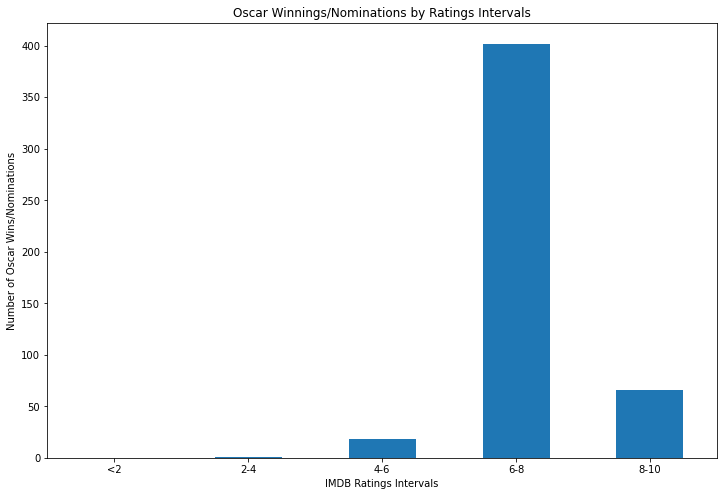

In [91]:
# Plot a bar chart to plot the relationship between the USA movies percentages by ratings intervals

# Set x-axis and y-axis for USA movies by ratings intervals
rating_intervals = np.arange(len(ratings_group_name))
oscar_count_by_interval = oscar_count.tolist()

# Set up the graph size and tick labels
plt.subplots(figsize=(12,8))
interval_names = ratings_group_name
xtick_location = [value for value in rating_intervals] 
plt.xticks(xtick_location, interval_names)

# Plot the bar chart and style the chart 
plt.bar(rating_intervals,
        oscar_count_by_interval,
        width=0.5,
        align='center')
plt.xlim(-0.5, len(rating_intervals)-0.5)
plt.title('Oscar Winnings/Nominations by Ratings Intervals')
plt.xlabel('IMDB Ratings Intervals')
plt.ylabel('Number of Oscar Wins/Nominations')
plt.show()

## Based on the ratings intervals, further analyze the number of USA movies within each interval.

In [92]:
# Drop the unnecessary columns to obtain a list with ONLY the movie names and ratings.
movies_country = merged_df_copy[['year','title', 'title_formatted', 'country_split']]
movies_country

,year,title,title_formatted,country_split
imdb_title_id,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,France
tt0035423,2001,Kate & Leopold,KateLeopold,USA
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,UK
tt0039442,1973,"Habla, mudita",Hablamudita,Spain
tt0054724,1971,Zombie,Zombie,USA
...,...,...,...,...
tt9908390,2020,Le lion,Lelion,France
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Netherlands
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,India


In [93]:
# Merge the movies_list with oscar_films_df on 'title_formatted'. In this merged data frame, we should be able to see all movie data plus the indication of which movies have won or been nominated in Oscar.
award_country = pd.merge(movies_country, oscar_films_df, how='left', on=['title_formatted','year'])

# Fill the non-winning/non-nominated movies with 'False'
award_country['oscar_win/nominated'] = award_list['oscar_win/nominated'].fillna(False)
award_country = award_country.drop(columns=['film'])
award_country

,year,title,title_formatted,country_split,oscar_win/nominated
0,1983,La glace à trois faces,Laglaceàtroisfaces,France,False
1,2001,Kate & Leopold,KateLeopold,USA,True
2,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,UK,False
3,1973,"Habla, mudita",Hablamudita,Spain,False
4,1971,Zombie,Zombie,USA,False
...,...,...,...,...,...
70259,2020,Le lion,Lelion,France,False
70260,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Netherlands,False
70261,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,India,False
70262,2019,Sokagin Çocuklari,SokaginÇocuklari,Turkey,False


In [94]:
# country_df = award_country.set_index('country_split')
# Create the bins in which Moving Ratings Data will be held
ratings_to_cut = [0, 1.9, 3.9, 5.9, 7.9, 10]
# Create the names for the bins
ratings_group_name = ['<2', '2-4', '4-6', '6-8', '8-10']

# Create rating groups using the dataset with non-duplicate players
ratings_groups = pd.cut(
    x=award_list['weighted_average_vote'],
    bins=ratings_to_cut,
    labels=ratings_group_name,
    include_lowest=True,
)


# Create data frame to show whether movies with higher ratings tend to receive more awards.

oscar_country = award_country.groupby([ratings_groups, 'country_split']).size()


oscar_n_country = {
    'Oscar Count': oscar_country
}

pd.set_option('display.max_rows', 1000)
oscar_by_country = pd.DataFrame(oscar_n_country)
# oscar_by_country

In [95]:
award_country.groupby(ratings_groups)['country_split'].count()

weighted_average_vote
<2        361
2-4      6277
4-6     27638
6-8     34547
8-10     1378
Name: country_split, dtype: int64

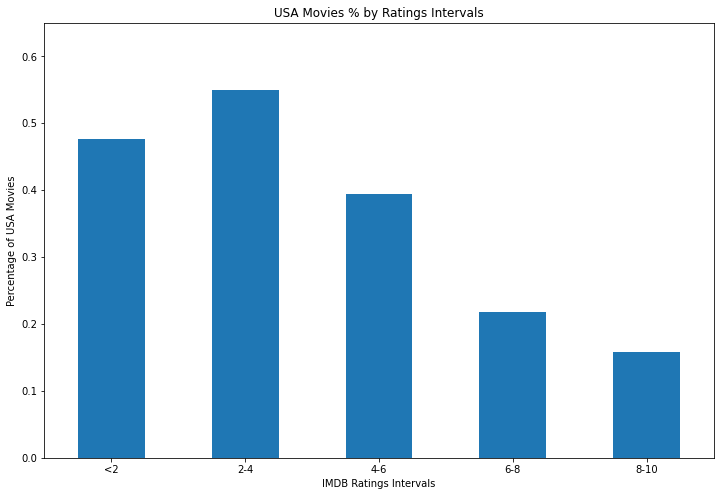

In [96]:
# Plot a bar chart to plot the relationship between the USA movies percentages by ratings intervals

# Set x-axis and y-axis for USA movies by ratings intervals
rating_intervals = np.arange(len(ratings_group_name))
usa_movies = [172,3451,10887,7540,218]
usa_movies_total = (award_country.groupby(ratings_groups)['country_split'].count()).tolist()
usa_movies_pct = [a / b for a, b in zip(usa_movies, usa_movies_total)]

# Set up the graph size and tick labels
plt.subplots(figsize=(12,8))
interval_names = ratings_group_name
xtick_location = [value for value in rating_intervals] 
plt.xticks(xtick_location, interval_names)

# Plot the bar chart and style the chart
plt.bar(rating_intervals,
        usa_movies_pct,
        width=0.5,
        align='center')
plt.xlim(-0.5, len(rating_intervals)-0.5)
plt.ylim(0, max(usa_movies_pct)+.1)
plt.title('USA Movies % by Ratings Intervals')
plt.xlabel('IMDB Ratings Intervals')
plt.ylabel('Percentage of USA Movies')
plt.show()

## Think about possible explanation of why highest ratings does NOT necessarily result in highest award winnings/nominations.
* Assumption One -> A lot of Oscar winnings/nominations (i.e., Art Direction, Costume Design, Make-up & Styling, etc.) are given to non-high-rating movies (aka, falls into the range of 6-8). These could take up the majority of the Oscar counts in our dataset.
* Assumption Two -> Assuming Oscar nominations are biased because they tend to favor the U.S. produced movies. However, based on our analysis, the least percent of USA movies falls into the 8-10 range. 
* Based on Assumption Two, the reason could be: 
*    1. Oscar does prefer higher-rated movies, that's why most of the winning/nominated movies are in the 6-8 & 8-10 ranges.
*    2. The reason why 8-10 range movies does not have highest award counts is because the population of USA movies in 8-10 rating range is too small.

# The processes below are to analyze the relationship between movie genres and award winnings/nominations. 

In [97]:
# Apply the same methodology as the previous ratings vs. award analysis.
# Drop the unnecessary columns to obtain a list with ONLY the movie names and ratings.
movies_genres = merged_df_copy[['year','title', 'title_formatted', 'genre_split']]
movies_genres

,year,title,title_formatted,genre_split
imdb_title_id,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,Drama
tt0035423,2001,Kate & Leopold,KateLeopold,Comedy
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Drama
tt0039442,1973,"Habla, mudita",Hablamudita,Drama
tt0054724,1971,Zombie,Zombie,Horror
...,...,...,...,...
tt9908390,2020,Le lion,Lelion,Comedy
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Comedy
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Drama


In [98]:
# Merge the movies_list with oscar_films_df on 'title_formatted'. In this merged data frame, we should be able to see all movie data plus the indication of which movies have won or been nominated in Oscar.
award_list_2 = pd.merge(movies_genres, oscar_films_df, how='left', on=['title_formatted','year'])

# Fill the non-winning/non-nominated movies with 'False'
award_list_2['oscar_win/nominated'] = award_list_2['oscar_win/nominated'].fillna(False)
award_list_2 = award_list_2.drop(columns=['film'])
award_list_2

,year,title,title_formatted,genre_split,oscar_win/nominated
0,1983,La glace à trois faces,Laglaceàtroisfaces,Drama,False
1,2001,Kate & Leopold,KateLeopold,Comedy,True
2,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Drama,False
3,1973,"Habla, mudita",Hablamudita,Drama,False
4,1971,Zombie,Zombie,Horror,False
...,...,...,...,...,...
70259,2020,Le lion,Lelion,Comedy,False
70260,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Comedy,False
70261,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Drama,False
70262,2019,Sokagin Çocuklari,SokaginÇocuklari,Drama,False


In [99]:
# Create data frame to determine if there's any relationship between movie genres and awards.

genre_awards = award_list_2.groupby(['genre_split'])['oscar_win/nominated'].sum()

award_by_genre = pd.DataFrame(genre_awards)
award_by_genre = award_by_genre.sort_values('oscar_win/nominated', ascending=False)
award_by_genre


,oscar_win/nominated
genre_split,
Drama,144
Action,90
Biography,84
Comedy,72
Animation,36
Crime,34
Adventure,22
Fantasy,2
Romance,2


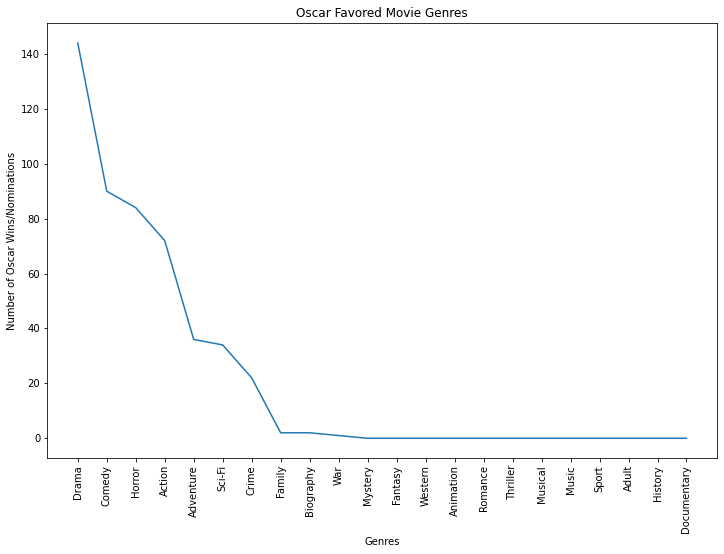

In [100]:
# Generate a line plot of genre versus oscar award counts 

# Set up x-axis & y-axis variable
genre_x_axis = (award_list_2['genre_split'].drop_duplicates()).tolist()
genre_y_axis = award_by_genre['oscar_win/nominated']


# Plot the line chart
plt.subplots(figsize=(12,8))
plt.xticks(rotation='vertical')

plt.plot(genre_x_axis,
         genre_y_axis)
plt.xlabel('Genres')
plt.ylabel('Number of Oscar Wins/Nominations')
plt.title('Oscar Favored Movie Genres')
plt.show()

# The processes below are to analyze the relationship between movie directors and award winnings/nominations.

In [101]:
# split directors, actors/actresses by comma delimiter and select first word

director_split = merged_df_copy["director"].str.split(",", n=1, expand = True)
merged_df_copy["director_split"] = director_split[0]

actor_split = merged_df_copy["actors"].str.split(",", n=1, expand = True)
merged_df_copy["actor_split"] = actor_split[0]

merged_df_copy.columns

Index(['title', 'original_title', 'year', 'date_published', 'director',
       'actors', 'avg_vote', 'votes', 'usa_gross_income',
       'worlwide_gross_income', 'reviews_from_users', 'reviews_from_critics',
       'genre_split', 'country_split', 'weighted_average_vote', 'total_votes',
       'mean_vote', 'median_vote', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'top1000_voters_rating',
       'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes',
       'non_us_voters_rating', 'non_us_voters_votes', 'males', 'females',
       'title_formatted', 'director_split', 'actor_split'],
      dtype='object')

In [102]:
# Apply the same methodology as the previous analyses.

# Drop the unnecessary columns to obtain a list with ONLY the movie names and ratings.
movies_directors = merged_df_copy[['year','title', 'title_formatted', 'director_split']]
movies_directors

,year,title,title_formatted,director_split
imdb_title_id,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,Jean Epstein
tt0035423,2001,Kate & Leopold,KateLeopold,James Mangold
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Michael Radford
tt0039442,1973,"Habla, mudita",Hablamudita,Manuel Gutiérrez Aragón
tt0054724,1971,Zombie,Zombie,Del Tenney
...,...,...,...,...
tt9908390,2020,Le lion,Lelion,Ludovic Colbeau-Justin
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Johan Nijenhuis
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Vineesh Aaradya


In [103]:
# Merge the movies_list with oscar_films_df on 'title_formatted'. In this merged data frame, we should be able to see all movie data plus the indication of which movies have won or been nominated in Oscar.
award_list_3 = pd.merge(movies_directors, oscar_films_df, how='left', on=['title_formatted','year'])

# Fill the non-winning/non-nominated movies with 'False'
award_list_3['oscar_win/nominated'] = award_list_3['oscar_win/nominated'].fillna(False)
award_list_3 = award_list_3.drop(columns=['film'])
award_list_3

,year,title,title_formatted,director_split,oscar_win/nominated
0,1983,La glace à trois faces,Laglaceàtroisfaces,Jean Epstein,False
1,2001,Kate & Leopold,KateLeopold,James Mangold,True
2,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Michael Radford,False
3,1973,"Habla, mudita",Hablamudita,Manuel Gutiérrez Aragón,False
4,1971,Zombie,Zombie,Del Tenney,False
...,...,...,...,...,...
70259,2020,Le lion,Lelion,Ludovic Colbeau-Justin,False
70260,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Johan Nijenhuis,False
70261,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Vineesh Aaradya,False
70262,2019,Sokagin Çocuklari,SokaginÇocuklari,Ahmet Faik Akinci,False


In [104]:
# Create data frame to determine if there's any relationship between movie directors and awards.

director_awards = award_list_3.groupby(['director_split'])['oscar_win/nominated'].sum()

award_by_director = pd.DataFrame(director_awards)
award_by_director = award_by_director.sort_values('oscar_win/nominated', ascending=False)
award_by_director_top = award_by_director.head(15)
award_by_director_top

,oscar_win/nominated
director_split,
Clint Eastwood,10
Woody Allen,10
Steven Spielberg,9
Martin Scorsese,7
Ridley Scott,5
Sam Mendes,5
Christopher Nolan,5
James Cameron,4
Tim Burton,4


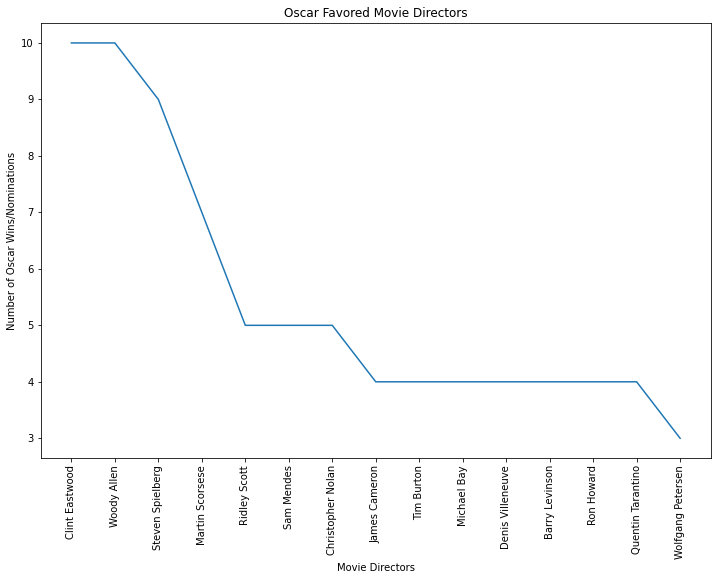

In [105]:
# Generate a line plot of movie directors versus oscar award counts 

# Set up x-axis & y-axis variable
director_x_axis = award_by_director_top['oscar_win/nominated'].index.tolist()
director_y_axis = award_by_director_top['oscar_win/nominated']


# Plot the line chart
plt.subplots(figsize=(12,8))
plt.xticks(rotation='vertical')

plt.plot(director_x_axis,
         director_y_axis)
plt.xlabel('Movie Directors')
plt.ylabel('Number of Oscar Wins/Nominations')
plt.title('Oscar Favored Movie Directors')
plt.show()

# The processes below are to analyze the relationship between movie actors/actresses and award winnings/nominations. 

In [106]:
# Apply the same methodology as the previous analyses.

# Drop the unnecessary columns to obtain a list with ONLY the movie names and ratings.
movies_actors = merged_df_copy[['year','title', 'title_formatted', 'actor_split']]
movies_actors

,year,title,title_formatted,actor_split
imdb_title_id,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,Jeanne Helbling
tt0035423,2001,Kate & Leopold,KateLeopold,Meg Ryan
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Phyllis Logan
tt0039442,1973,"Habla, mudita",Hablamudita,José Luis López Vázquez
tt0054724,1971,Zombie,Zombie,William Joyce
...,...,...,...,...
tt9908390,2020,Le lion,Lelion,Dany Boon
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Herman Finkers
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Anoop Chandran


In [107]:
# Merge the movies_list with oscar_films_df on 'title_formatted'. In this merged data frame, we should be able to see all movie data plus the indication of which movies have won or been nominated in Oscar.
award_list_4 = pd.merge(movies_actors, oscar_films_df, how='left', on=['title_formatted','year'])

# Fill the non-winning/non-nominated movies with 'False'
award_list_4['oscar_win/nominated'] = award_list_4['oscar_win/nominated'].fillna(False)
award_list_4 = award_list_4.drop(columns=['film'])
award_list_4

,year,title,title_formatted,actor_split,oscar_win/nominated
0,1983,La glace à trois faces,Laglaceàtroisfaces,Jeanne Helbling,False
1,2001,Kate & Leopold,KateLeopold,Meg Ryan,True
2,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,Phyllis Logan,False
3,1973,"Habla, mudita",Hablamudita,José Luis López Vázquez,False
4,1971,Zombie,Zombie,William Joyce,False
...,...,...,...,...,...
70259,2020,Le lion,Lelion,Dany Boon,False
70260,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,Herman Finkers,False
70261,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,Anoop Chandran,False
70262,2019,Sokagin Çocuklari,SokaginÇocuklari,Ahmet Faik Akinci,False


In [108]:
# Create data frame to determine if there's any relationship between movie actors and awards.

actor_awards = award_list_4.groupby(['actor_split'])['oscar_win/nominated'].sum()

award_by_actor = pd.DataFrame(actor_awards)
award_by_actor = award_by_actor.sort_values('oscar_win/nominated', ascending=False)
award_by_actor_top = award_by_actor.head(15)
award_by_actor_top

,oscar_win/nominated
actor_split,
Robert Downey Jr.,7
Tom Hanks,6
Ryan Gosling,5
Tom Cruise,5
Hugh Jackman,5
Leonardo DiCaprio,5
Jeff Bridges,5
Meryl Streep,4
Jessica Lange,4


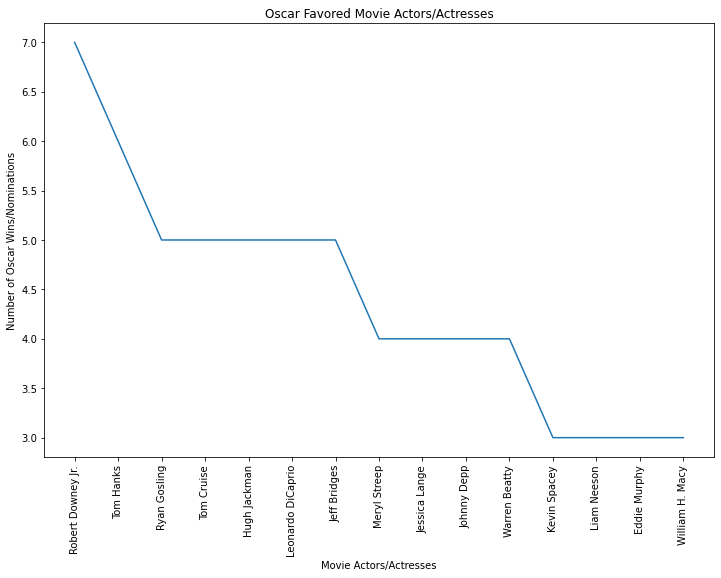

In [109]:
# Generate a line plot of movie actors/actresses versus oscar award counts 

# Set up x-axis & y-axis variable
actor_x_axis = award_by_actor_top['oscar_win/nominated'].index.tolist()
actor_y_axis = award_by_actor_top['oscar_win/nominated']


# Plot the line chart
plt.subplots(figsize=(12,8))
plt.xticks(rotation='vertical')

plt.plot(actor_x_axis,
         actor_y_axis)
plt.xlabel('Movie Actors/Actresses')
plt.ylabel('Number of Oscar Wins/Nominations')
plt.title('Oscar Favored Movie Actors/Actresses')
plt.show()

# The analysis below is to find movie directors' impacts on movie revenues. 

In [151]:
# From the orignal merged_df_copy data frame, drop the unnecessary columns to obtain a list with ONLY the movie names, director names and worldwide revenues.
revenue_n_director = merged_df_copy[['year','title', 'title_formatted', 'worlwide_gross_income', 'director_split']]
revenue_n_director

,year,title,title_formatted,worlwide_gross_income,director_split
imdb_title_id,,,,,
tt0017938,1983,La glace à trois faces,Laglaceàtroisfaces,NaN,Jean Epstein
tt0035423,2001,Kate & Leopold,KateLeopold,76019048.0,James Mangold
tt0036606,1983,"Another time, another place - Una storia d'amore",AnothertimeanotherplaceUnastoriadamore,NaN,Michael Radford
tt0039442,1973,"Habla, mudita",Hablamudita,NaN,Manuel Gutiérrez Aragón
tt0054724,1971,Zombie,Zombie,NaN,Del Tenney
...,...,...,...,...,...
tt9908390,2020,Le lion,Lelion,3507171.0,Ludovic Colbeau-Justin
tt9911196,2020,De Beentjes van Sint-Hildegard,DeBeentjesvanSintHildegard,7299062.0,Johan Nijenhuis
tt9911774,2019,Padmavyuhathile Abhimanyu,PadmavyuhathileAbhimanyu,NaN,Vineesh Aaradya


In [173]:
# Create a data frame to show how much movie revenues each director has made in total.
revenue_for_director = revenue_n_director.groupby(['director_split'])['worlwide_gross_income'].sum()
revenue_vs_director = pd.DataFrame(revenue_for_director)
# revenue_for_director
revenue_vs_director = revenue_vs_director.sort_values('worlwide_gross_income', ascending=False)

# Filter the top 15 most-wealthy directors.
revenue_vs_director_top = revenue_vs_director.head(15)

# Convert the revenue column (the 'worlwide_gross_income') column to show numbers in millions dollars.
revenue_vs_director_top["worlwide_gross_income"] = revenue_vs_director_top["worlwide_gross_income"] / 1000000
revenue_vs_director_top

<ipython-input-173-bf0b73e97d2f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_vs_director_top["worlwide_gross_income"] = revenue_vs_director_top["worlwide_gross_income"] / 1000000


,worlwide_gross_income
director_split,
Steven Spielberg,10521.265279
Anthony Russo,6848.715547
Peter Jackson,6601.458791
Michael Bay,6451.692798
James Cameron,6185.441282
David Yates,6021.255883
Christopher Nolan,4870.773767
J.J. Abrams,4653.989459
Tim Burton,4456.403545


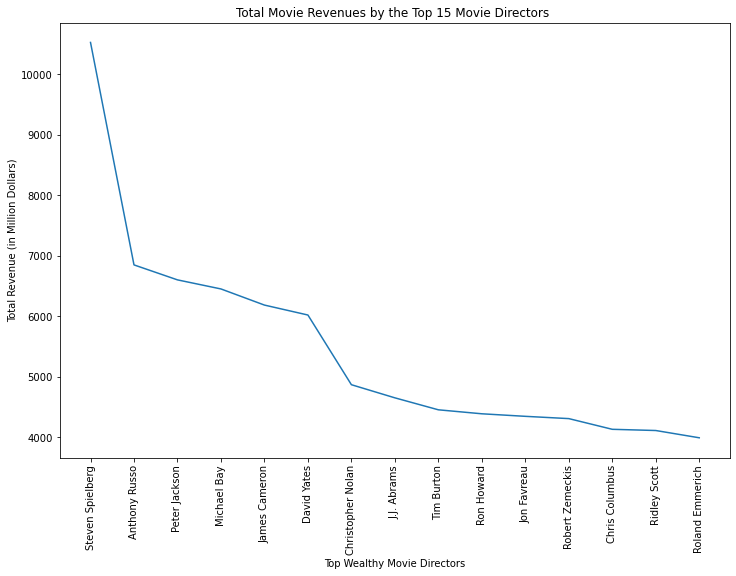

In [172]:
# Generate a line plot to show which directors impact movie revenues the most

# Set up x-axis & y-axis variable
director_revenue_x_axis = revenue_vs_director_top['worlwide_gross_income'].index.tolist()
director_revenue_y_axis = revenue_vs_director_top['worlwide_gross_income']


# Plot the line chart
plt.subplots(figsize=(12,8))
plt.xticks(rotation='vertical')

plt.plot(director_revenue_x_axis,
         director_revenue_y_axis)
plt.xlabel('Top Wealthy Movie Directors')
plt.ylabel('Total Revenue (in Million Dollars)')
plt.title('Total Movie Revenues by the Top 15 Movie Directors ')
plt.show()

In [146]:
# award_list_4['worlwide_gross_income'].sum()

# award_n_revenue = award_list_4.groupby(['oscar_win/nominated'])['worlwide_gross_income'].sum()
# award_for_revenue = pd.DataFrame(award_n_revenue)
# award_for_revenue


# # award_x_axis = award_for_revenue['worlwide_gross_income'].index.tolist()
# # award_y_axis = award_for_revenue['worlwide_gross_income'].tolist()
# award_for_revenue.plot(kind='bar'
#                 )
